In [25]:
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [26]:
df = pd.read_csv("baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [27]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [29]:
df.RS.mean()

np.float64(715.0819805194806)

In [30]:
df[df.Team == "ARI"].RS.mean()

np.float64(742.2)

In [31]:
df[df.Team == "ARI"].head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
30,ARI,NL,2011,731,662,94,0.322,0.413,0.250,1,5.0,4.0,162,0.316,0.409
60,ARI,NL,2010,713,836,65,0.325,0.416,0.250,0,NaN,NaN,162,0.340,0.448
90,ARI,NL,2009,720,782,70,0.324,0.418,0.253,0,NaN,NaN,162,0.330,0.419
120,ARI,NL,2008,720,706,82,0.327,0.415,0.251,0,NaN,NaN,162,0.318,0.398


In [32]:
# Mean of Runs Scored by the Arizona team since 2005
df.loc[(df.Team == "ARI") & (df.Year >= 2005)].RS.mean()

np.float64(724.875)

In [33]:
# What is the average of Runs Allowed by the Chicago Tem (CHC)
# Before 2000 and after 2005
df.loc[(df.Team == "CHC") & ((df.Year < 2000) | (df.Year > 2005))].RA.mean()

np.float64(725.4634146341464)

In [34]:
df.W.median()

np.float64(81.0)

0.32633116883116886
0.326
0    0.322
Name: OBP, dtype: float64


<Axes: >

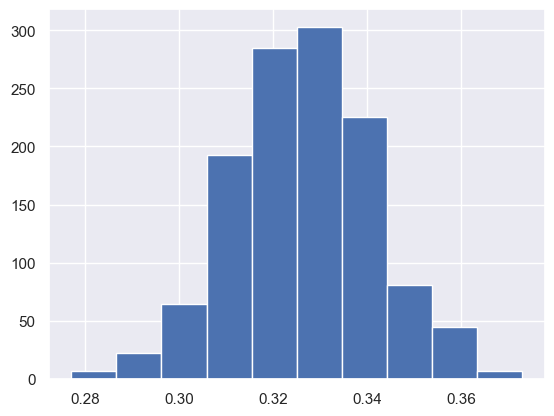

In [35]:
# Calculate the mean, median, and mode of the 'OBP' column
print(df.OBP.mean())
print(df.OBP.median())
print(df.OBP.mode())

# Plot the histogram of the 'OBP' column
df.OBP.hist()

In [36]:
# Question: What is the Mode of OBP during the year 2010
df.loc[df.Year == 2010].OBP.mode()

0    0.332
Name: OBP, dtype: float64

In [37]:
# Question: Most Common Season Ranking for Boston (BOS)
df.loc[df.Team == 'BOS'].RankSeason.mode()

0    3.0
Name: RankSeason, dtype: float64

In [38]:
# Mean, standard deviation, and the variance of OOBP
print(f"Mean: {df.OOBP.mean()}")
print(f"STD sample: {df.OOBP.std()}")
print(f"STD pop: {df.OOBP.std(ddof = 0)}")
print(f"Variance: {df.OOBP.std() * df .OOBP.std()}")
print(f"Variance: {df.OOBP.var()}")

Mean: 0.3322642857142857
STD sample: 0.015295316041389943
STD pop: 0.015277096480377029
Variance: 0.00023394669280600052
Variance: 0.00023394669280600054


Mean of BA: 0.25927272727272727
STD Sample of BA: 0.012907228928000314
Variance of pop of BA: 0.00016646133412042514


<Axes: >

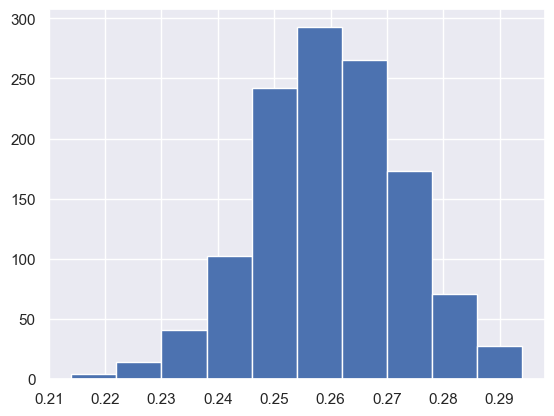

In [39]:
# What is the standard deviation of the sample of BA
# and the variance of the population of BA
print(f"Mean of BA: {df.BA.mean()}")
print(f"STD Sample of BA: {df.BA.std()}")
print(f"Variance of pop of BA: {df.BA.var(ddof = 0)}")

# Plot the histogram of the 'BA' column
df.BA.hist()

In [40]:
# Calculate the Coefficient of Variation (CV) for the Runs Scored variable
cv = df.RS.std() / df.RS.mean()
print(f"The CV for RS is {cv}")

The CV for RS is 0.1280053148279153


In [41]:
# Calculate the Coefficient of Variation (CV) for the Wins variable
cv1 = df.W.std() / df.W.mean()
print(f"The CV for W is {cv1}")

The CV for W is 0.14162597377041425


## Covariance


In [42]:
# Select continuous variables for covariance calculation
df_co = df[["RS", "RA", "W"]]

# Compute and display the covariance matrix
df_co.cov()

,RS,RA,W
RS,8378.526986,3238.783688,536.724349
RA,3238.783688,8663.873859,-567.810176
W,536.724349,-567.810176,131.288950


In [43]:
df_co2 = df[["OBP", "SLG", "BA"]]
df_co2.cov()

,OBP,SLG,BA
OBP,0.000225,0.000395,0.000165
SLG,0.000395,0.001107,0.000339
BA,0.000165,0.000339,0.000167


## Correlation

In [44]:
# Correlation Matrix
df_co.corr()
# Rule of thumb
# Correlation > 0.5 -> strong
# Correlation > 0.3 & < 0.5 -< medium
# Correlation > 0.1 & < 0.3 -> low

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

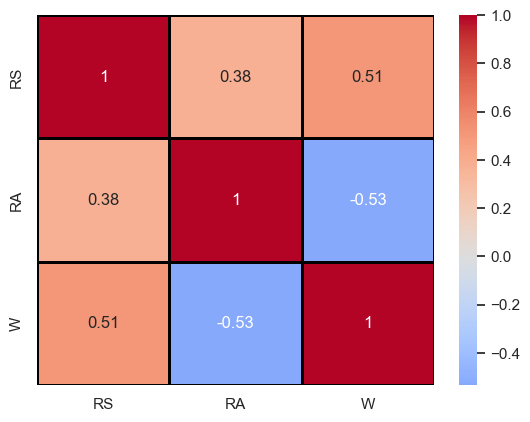

In [45]:
# Visualization via Heatmap
sns.heatmap(data = df_co.corr(),       # Correlation matrix of the selected variables
            annot = True,              # Annotate cells with correlation values
            center = 0,                # Center the colormap at zero
            cmap = 'coolwarm',         # Colormap for the heatmap
            linewidths = 1,            # Width of the lines that divide cells
            linecolor = 'black')

<Axes: >

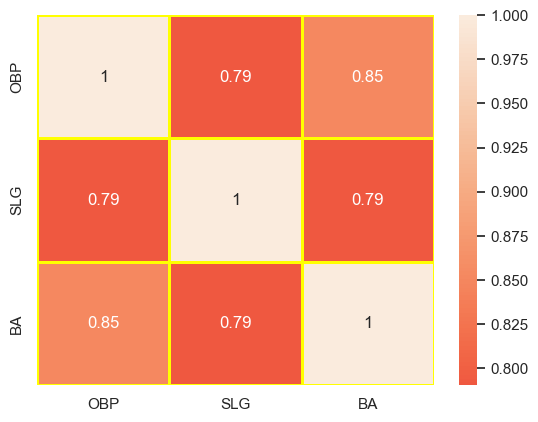

In [46]:
# Do a correlation matrix, visualize it but change at least 2 parameters
sns.heatmap(data = df_co2.corr(),
            annot = True,
            center = 0.7,
            cmap = 'rocket',
            linewidths = 2,
            linecolor = 'yellow')

## Normal Distribution

<Axes: ylabel='Density'>

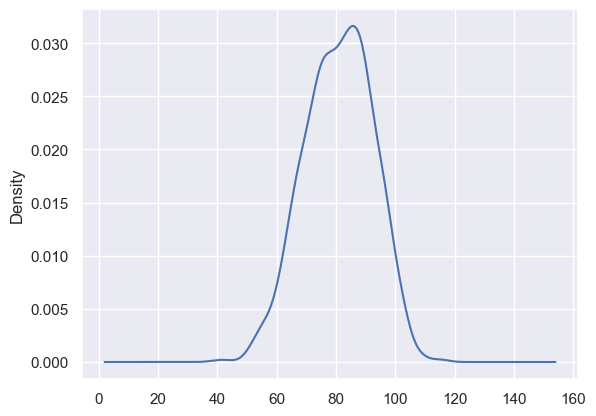

In [47]:
# Plotting the density of the 'W'
df.W.plot.density()

In [48]:
# Check the proportion of 'W' values within ±3 standard deviations from the mean
# 68-95-99 check
print(df.loc[(df.W <= df.W.mean() + 3 * df.W.std()) &
       (df.W >= df.W.mean() - 3 * df.W.std())].W.count()/df.W.count())

0.997564935064935


<Axes: ylabel='Density'>

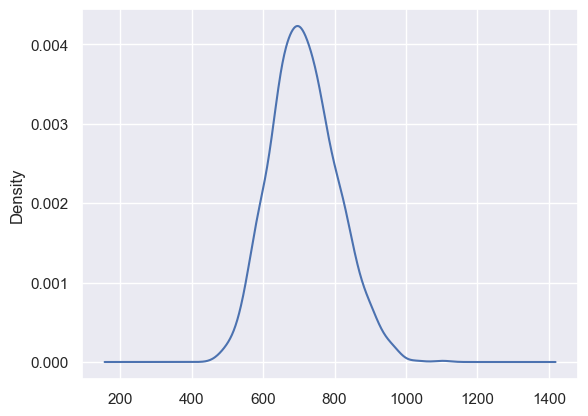

In [49]:
# Plotting the density of the 'RA'
df.RA.plot.density()